#Consumer Complaints

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [54]:
%matplotlib inline

In [55]:
!head complaints_dec_2014.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1177167,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,
1177166,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,
1177165,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,
1177164,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,
1177163,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhan

In [56]:
consumer_complaints = pd.read_csv("complaints_dec_2014.csv")
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [57]:
consumer_complaints.describe()

,Complaint ID,ZIP code
count,11543.000000,11409.000000
mean,1157276.786451,50259.375756
std,11908.384438,30712.384693
min,1136157.000000,10.000000
25%,1146708.500000,23234.000000
50%,1156954.000000,44203.000000
75%,1167656.000000,78623.000000
max,1178091.000000,99712.000000


##Number of Complaints by Product

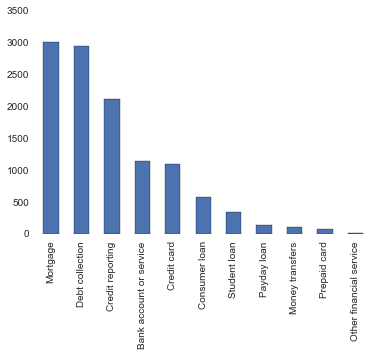

In [58]:
consumer_complaints["Product"].value_counts().plot(kind="bar")

####This bar graph shows the number of complaints by product. There is an exponential decrease in complaints by product from the Mortage category down to the Other Financial Service category.

##Number of Complaints by Company(Top 10):

In [59]:
consumer_complaints["Company"].value_counts()[0:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

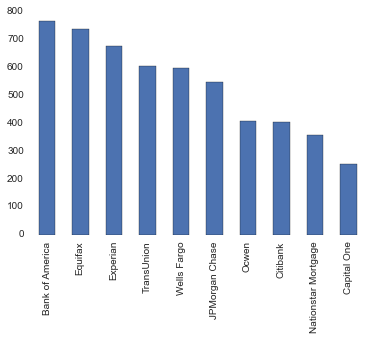

In [60]:
consumer_complaints["Company"].value_counts()[0:10].plot(kind="bar")

####Bar graph for number of complaints by company(top 10). Bank of America had the most complaints with 766.  Capital One had the least amount of complaints with  252.

##Number of Complaints by company response

In [61]:
consumer_complaints["Company response"].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

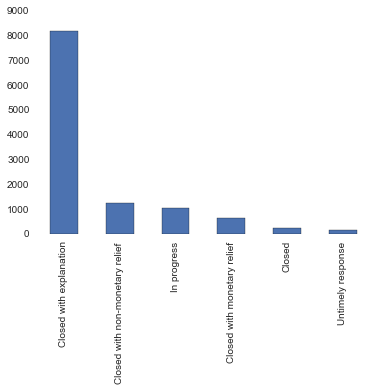

In [62]:
consumer_complaints["Company response"].value_counts().plot(kind="bar")

####Bar graph of the number of complaints by company response. The most complaints by company response came from Closed wtih explanation with 8185. The lowest amount of complaints by company response came from the Untimely response category of 167. 

##Mean number of complaints by day of week

In [63]:
consumer_complaints["Date received"] = pd.to_datetime(consumer_complaints['Date received'])



In [64]:
consumer_complaints["Complaint by Day"] = consumer_complaints["Date received"].apply(lambda x: x.weekday())

In [65]:
consumer_complaints.replace({"Complaint by Day" : {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}}, inplace=True)

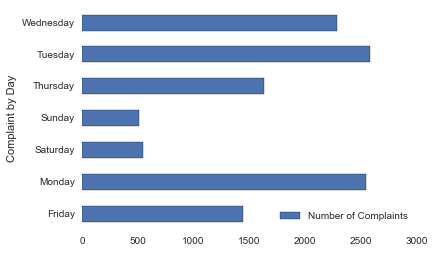

In [66]:
consumer_complaints[[ "Complaint ID", "Complaint by Day"]].groupby("Complaint by Day").count().rename(columns={"Complaint ID": "Number of Complaints"}).plot(kind="barh")

####Based on this graph, we can conclude that at the beginning of the week( Monday, Tuesday, Wednesday) people complain more than they do later in the week( Thursday, Friday). People complain the least amount on Saturday and Sunday. 